# $k$-NN for a classification problem on the Iris dataset

In this notebook we will train a $k$-NN classifier on the [Iris](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset) dataset using the $k$-NN implementation [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier) from the python library [scikit-learn](https://scikit-learn.org/stable/index.html) 

Since it is the first exercice, instructions will be as detailed as possible. In some lines in the code you will see the comment `# TODO!`. These are the missing parts you will need to implement on your own.


You can choose to:
- Start from scratch if you feel more comfortable with your own code,
- Code mostly on your own and look at this notebook for inspiration whenever needed (recommended, especially for the plotting parts), or
- Try to fit exactly to this notebook. If your not very familiar with Python it could be a good option but otherwise try at least to think about how you would do without any help.


We start by importing the required packages:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, model_selection, metrics, __version__

### Loading and splitting the Iris dataset

- Load the Iris data set using [datasets.load_iris()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris).
- Use [model_selection.train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn-model-selection-train-test-split) to split your dataset into 2 datasets: a training one and a testing one. To split your dataset into 3 parts (training, validation and test data), simply call this function twice. Once to split into training data and the remaining data. Then, once more on the remaining data to split this into validation and test data.

In [3]:
dataset = datasets.load_iris() # Load the Iris dataset (150 samples, each having 4 features)
X = dataset.data[:, :2] # Store the first two features (sepal length in cm and sepal width in cm)
y = dataset.target      # Store the labels (0, 1 or 2) coding the Iris species of each sample

In [143]:
print('sklearn: %s' % __version__)

sklearn: 1.3.0


In [5]:
seed = 123 # Fix a random seed for reproducibility

# Shuffle and split the data into training data and validation/test data
# Split such that 70% of the data is used for training, and 30% is used for validation and test
X_train, X_val_test, y_train, y_val_test = model_selection.train_test_split(X, y, test_size=0.3, shuffle=True, random_state=seed)

# Shuffle and split the data into validation and test sets with a ratio of 0.5/0.5:
X_val, X_test, y_val, y_test = model_selection.train_test_split(X_val_test, y_val_test, test_size=0.5, shuffle=True, random_state=seed)

# Store number of samples in each dataset:
N_train = len(X_train) # You can also use X_train.shape[0] to get the number of rows in X_train
N_val = len(X_val)
N_test = len(X_test)

print(f"Number of samples in each split:\nTraining:\t{N_train}\nValidation:\t{N_val}\nTesting:\t{N_test}")



Number of samples in each split:
Training:	105
Validation:	22
Testing:	23


### Plots colors

Let us pre-define some colors to use when plotting. Here is an example of colors you can use for the 3 classes with 
- a light version for the validation points, testing points, and decision boundaries, and
- a bold/dark version for the training points.

In [6]:
### Plot parameters:
# Light colors for decision boundaries plots:
cmap_light = ListedColormap(['tomato', 'springgreen', 'skyblue'])
cmap_bold = ListedColormap(['firebrick', 'green', 'navy'])

### Plotting our dataset

Fill in the missing parts in the function `plot_iris()` which is supposed to plot the points in our dataset. We will use dark/bold colors for the training data points, and light colors for the points in the validation and test dataset.

To plot a scatter plot of points $(x,y)$ in the plane we will use [plt.scatter()](https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib-pyplot-scatter) from matplotlib.

In [7]:
def plot_iris(X_train, y_train, X_val_test, y_val_test):
    """
    Scatter plots of training and testing iris datapoints
    """

    # Matplotlib method to get current axis
    ax = plt.gca()    
    # Scatter plot validation or testing points using light colors
    ax.scatter(
        X_val_test[:, 0], X_val_test[:, 1],
        c=y_val_test, 
        cmap=cmap_light, s=30, edgecolor="k", zorder=2
    )
    # Overlay the training points in bold colors:
    ax.scatter(
        X_train[:, 0], X_train[:, 1],
        c=y_train,
        cmap=cmap_bold, s=30, edgecolor="k", zorder=2
    )
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    return ax

Test your implementation of `plot_iris()` by running the following code cell:

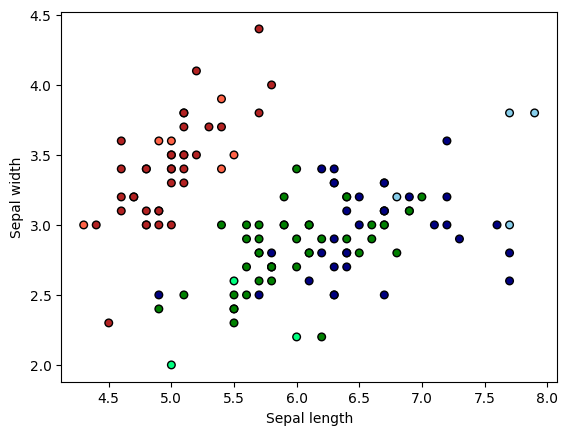

In [8]:
plot_iris(X_train, y_train, X_val, y_val)
plt.show()

### Plotting the $k$-NN boundaries

Plotting the decision boundaries for our $k$-NN classifier requires a bit more work when using `matplotlib`. To plot a color plot we use [pcolormesh()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pcolormesh.html#matplotlib-pyplot-pcolormesh). To draw the decision boundaries, the idea is to create a meshgrid and to let the $k$-NN decide to which color each gridpoint belongs.

Most of the code is provided below and you are only required to fill in the missing parts.

In [9]:
def draw_knn_boundaries(
    knn,     # sklearn k-NN model
    h=0.02,  # Step size in the mesh (resolution)
):
    """
    Draw boundaries as decided by the trained knn
    """
    ax = plt.gca()
    [xmin, xmax] = ax.get_xlim()
    [ymin, ymax] = ax.get_ylim()
    # Generate the axis associated to the first feature: 
    x_axis = np.arange(xmin, xmax, h)
    # Generate the axis associated to the 2nd feature: 
    y_axis = np.arange(ymin, ymax, h)
    # Generate a meshgrid (2D grid) from the 2 axis:
    x_grid, y_grid = np.meshgrid(x_axis, y_axis)
    # Vectorize the grids into column vectors:
    x_grid_vectorized = x_grid.flatten()
    x_grid_vectorized = np.expand_dims(x_grid_vectorized, axis=1)
    y_grid_vectorized = y_grid.flatten()
    y_grid_vectorized = np.expand_dims(y_grid_vectorized, axis=1)
    # Concatenate the vectorized grids:
    grid = np.concatenate((x_grid_vectorized, y_grid_vectorized), axis=1)
    #grid = np.vstack([x_grid.ravel(), y_grid.ravel()]).T
    # Now you can use 'grid' as data to classify by the knn 

    # Predict concatenated features (our grid) to get the decision boundaries:
    decision_boundaries = knn.predict(grid)

    # Reshape the decision boundaries into a 2D matrix:
    decision_boundaries = decision_boundaries.reshape(x_grid.shape)
    plt.pcolormesh(x_grid, y_grid, decision_boundaries, cmap=cmap_light, zorder=1)
    return ax

### Main function

Now, we will write a function `knn_on_iris()` that takes the following arguments:
- `k` : (number of neighbours)
- `X_train` : our training dataset features
- `y_train` : our training dataset labels
- `X_val` : our validation dataset features
- `y_val` : our validation dataset labels

and returns the following:
- `k_NN` : a fitted `KNeighborsClassifier` model
- `train_accuracy` : the model's accuracy on the training dataset
- `val_accuracy` : the model`s accuracy on the validation dataset

In addition, the function should plot the data points in the training and validation dataset together with the learned decision boundaries.

**Tips:**
- To create an instance of the KNeighborsClassifier class use the constructor [neighbors.KNeighborsClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier)
- To train your instance of KNeighborsClassifier use [KNeighborsClassifier.fit()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit)
- Once trained you can use [KNeighborsClassifier.predict()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict) to predict the iris class of a datapoint or of a gridpoint

Fill in the missing parts in the code cell below.

In [144]:
# Main work here:
def knn_on_iris(
    k,
    X_train,
    y_train,
    X_val,
    y_val,
):
    """
    Train a knn and plot its boundaries on iris data
    """

    # --------------------
    # Plot iris data
    # --------------------
    plot_iris(X_train, y_train, X_val, y_val)

    # --------------------
    # Train the knn
    # --------------------

    # Create an instance of the KNeighborsClassifier class for current value of k:
    k_NN = neighbors.KNeighborsClassifier(n_neighbors=k)

    # Train the classifier with the training data
    k_NN.fit(X_train, y_train)

    # --------------------
    # Draw knn boundaries
    # --------------------
    draw_knn_boundaries(k_NN) 
    plt.title(f"k-NN classification on Iris, k = {k_NN.get_params().get('n_neighbors')}")
    plt.show()

    # --------------------
    # Model accuracy:
    # --------------------

    # Accuracy on train set:
    train_predictions = k_NN.predict(X_train)
    good_train_predictions = (train_predictions == y_train)
    train_accuracy = np.sum(good_train_predictions) / len(y_train)
    
    # Accuracy on validation set:
    val_predictions = k_NN.predict(X_val)
    good_val_predictions = good_train_predictions
    val_accuracy = metrics.accuracy_score(y_val, val_predictions)

    # Accuracy on test set:
    test_predictions = k_NN.predict(X_test)
    good_val_predictions = good_train_predictions
    test_accuracy = metrics.accuracy_score(y_test, test_predictions)
    
    return (k_NN, train_accuracy, val_accuracy, test_accuracy)

### Evaluate your $k$-NN

Complete and then run the following code cell to train and validate $k$-NN classifiers for different choices of $k$. 

**Tip:** If you cannot see the entire output without having to scroll, then right-click the output and click `Disable Scrolling for Outputs`.

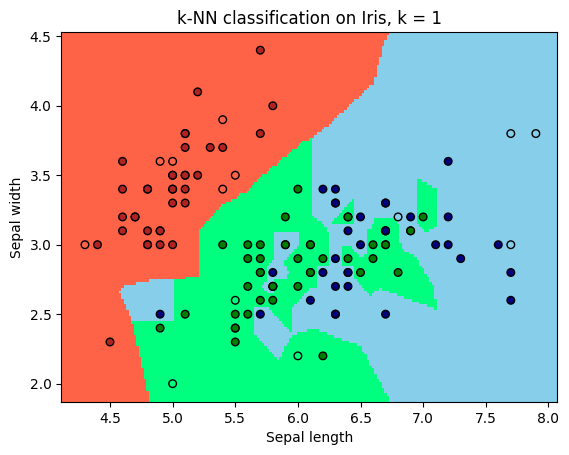

k-NN classifier trained with k = 1
0.9428571428571428
0.8181818181818182


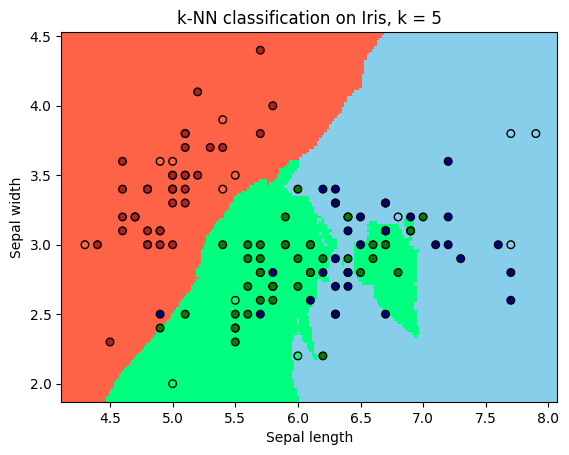

k-NN classifier trained with k = 5
0.8476190476190476
0.8181818181818182


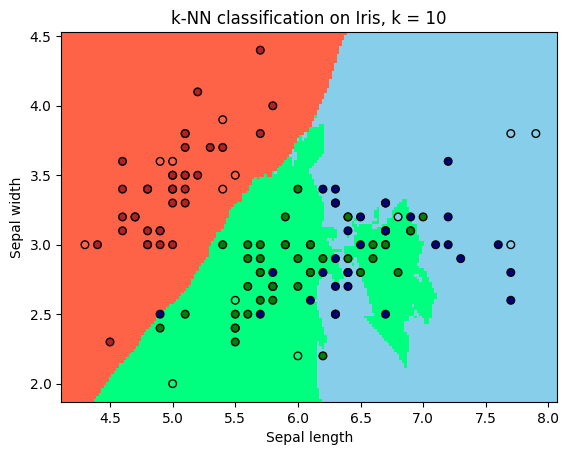

k-NN classifier trained with k = 10
0.8571428571428571
0.8181818181818182


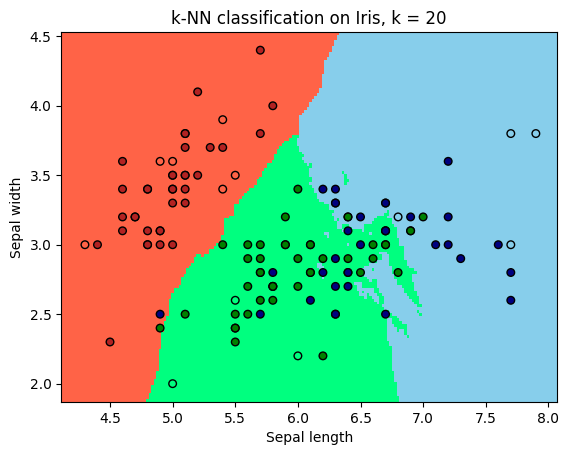

k-NN classifier trained with k = 20
0.8095238095238095
0.8636363636363636


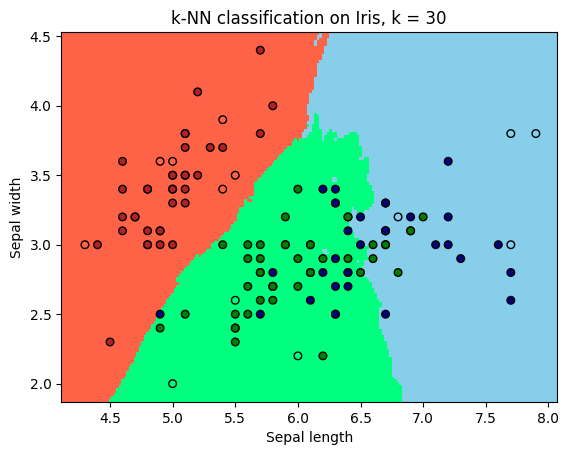

k-NN classifier trained with k = 30
0.7619047619047619
0.9090909090909091


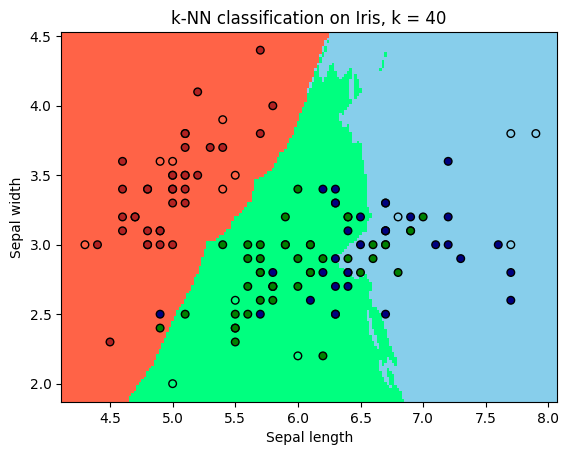

k-NN classifier trained with k = 40
0.7428571428571429
0.9545454545454546


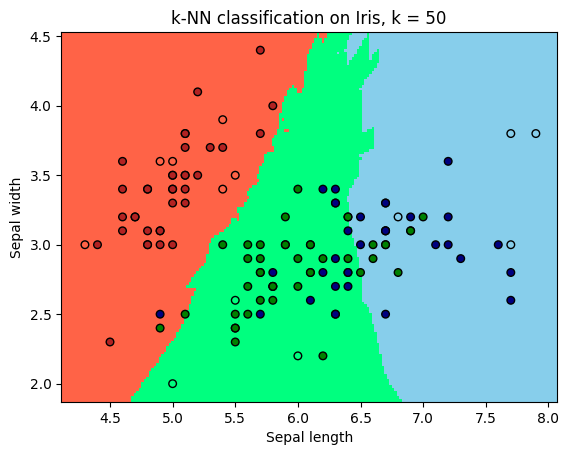

k-NN classifier trained with k = 50
0.7428571428571429
0.9090909090909091


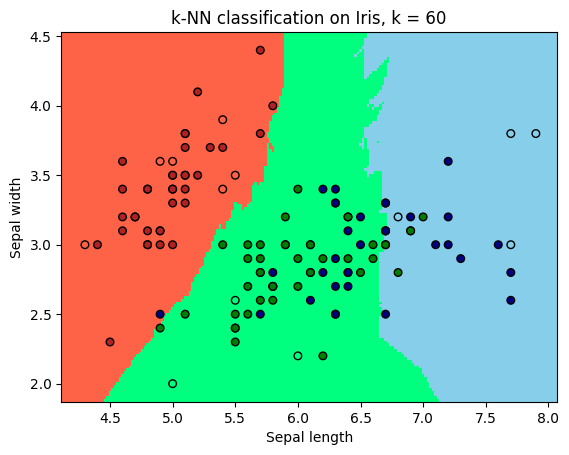

k-NN classifier trained with k = 60
0.7714285714285715
0.9090909090909091


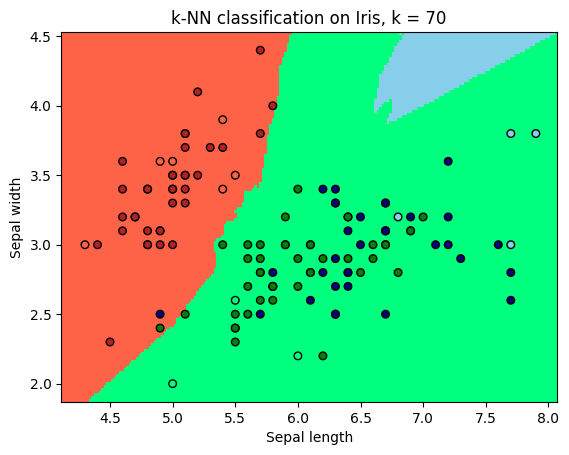

k-NN classifier trained with k = 70
0.6761904761904762
0.6818181818181818


In [145]:
### k-NN on the Iris dataset for different values of k:
# Create vectors to store the results for each k:
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Train a knn for each value of k in k_list
k_list = [1, 5, 10, 20, 30, 40, 50, 60, 70]
k_NN_models = []
for k in k_list:
    (k_NN, train_acc, val_acc, test_acc) = knn_on_iris(k, X_train, y_train, X_val, y_val)
    print(f"k-NN classifier trained with k = {k}")
    # Print train accuracy
    print(train_acc)
    # Print validation accuracy
    print(val_acc)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)
    k_NN_models.append(k_NN)



---
### Interpreting results


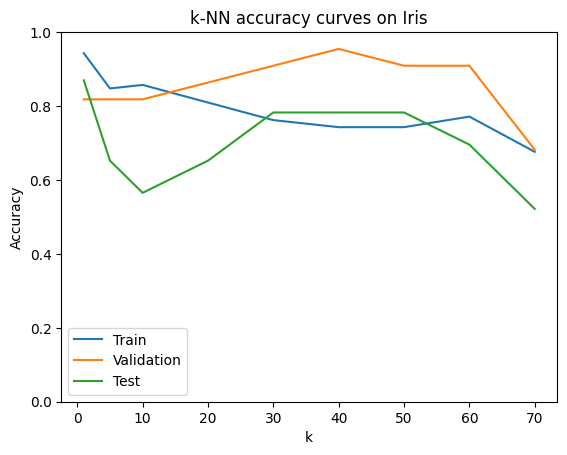

In [12]:
# Plot accuracy curves:
plt.plot(k_list, train_accuracies)
plt.plot(k_list, val_accuracies)
plt.plot(k_list, test_accuracies)
plt.ylim(0, 1)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation', 'Test'], loc='best')
plt.title("k-NN accuracy curves on Iris")

# Display plots:
plt.show()

#print(f'points in training data: {X_train.size}, unique points in training data: {np.unique(X_train).size}')
#print(type(X_train))








The training accuracy falls when k gets higher; this is expected and good since the models generalizes more. The validation score gets up to 95% with the model k = 40. The models up to 60 are doing fine.



The accuracy is not 100% when k=1, but 94%. This could be caused by different labels having the same features, and therefore guaranteed mislabling. The test predictions are not great, maybe caused by high noise or variance in test data

### Looking for duplicates

In [26]:
#Making the x training data to a list. Doing it with list because I had some trouble with finding the values in arrays. .where() giving irrelevant answers.
X_train_list = [[x[0], x[1]] for x in X_train]

In [138]:
#Creating a dictionary and storing the labels to the values. 
value_dict = {}
dupe_data = []
for count, x in enumerate(X_train_list):
    if str(x) not in value_dict.keys():
        value_dict[str(x)] = [y_train[count]]
    else:
        value_dict[str(x)].append(y_train[count])
        

#Picking the values that has more than 1 unique label
for key, value in value_dict.items():
    if (len(value) > 1 and len(set(value))) > 1:
        print(f'The value: {key}, has duplicate data points with some different labels: {value}\n')
        dupe_data.append(key)

#Converting the entries in the list from '[]' to  [], and then converting to np.array so it could be used in scatter.
dupe_data = [eval(x) for x in dupe_data]
dupe_data = np.array(dupe_data)

knn1 = k_NN_models[0]

The value: [6.7, 3.1], has duplicate data points with some different labels: [1, 1, 2]

The value: [5.8, 2.7], has duplicate data points with some different labels: [2, 1]

The value: [6.4, 3.2], has duplicate data points with some different labels: [2, 1]

The value: [5.9, 3.0], has duplicate data points with some different labels: [2, 1]

The value: [6.3, 3.3], has duplicate data points with some different labels: [1, 2]

The value: [6.9, 3.1], has duplicate data points with some different labels: [2, 1]



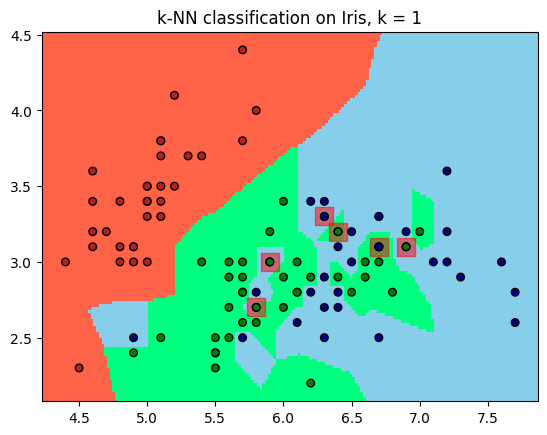

In [139]:
#Drawing the training points
plt.scatter(
        X_train[:, 0], X_train[:, 1],
        c=y_train,
        cmap=cmap_bold, s=30, edgecolor="k", zorder=2
    )
#Drawing the decision boundary
draw_knn_boundaries(knn1)
plt.title(f"k-NN classification on Iris, k = {knn1.get_params().get('n_neighbors')}")

#Highlighting the conflicting data points.
plt.scatter(
        dupe_data[:, 0], dupe_data[:, 1],
        marker = ',', s=150, c='red', alpha=0.5
    )
plt.show()

### Did the 6 duplicate points cause the accuracy error?

In [140]:
k1_ac = train_accuracies[0]
print(f'The accuracy of the model k=1 is: {k1_ac: .5f}')

#Number of mistakes is the total amount of data - the correct labled predictions.
wrong_lab_num = 105 - (105*k1_ac)
print(f'The number of mistakes in training accuracy: {wrong_lab_num}')

The accuracy of the model k=1 is:  0.94286
The number of mistakes in training accuracy: 6.0


### Duplicates

The red-box highlighted training data has the same values but different labels. Normally, when k = 1, you get 100% accurate predictions on the training data. But in this case, we will have six cases where the decision boundary is forced to choose between label 1 or label 2, when both are correct. Hence, the wrong predictions lowers the accuracy.


### Testing your selected model

Now that you have trained several models and plotted their accuracies, automatically select the best model based on their validation accuracies. You can use `np.argmax` to get the index of the highest value in `val_accuracies`.
 
Evaluate the performance of your selected model by computing its accuracy on the **test dataset**.

In [73]:
# Automatically select the best model based on validation accuracies
best_pos = np.argmax(val_accuracies)
best_model = k_NN_models[best_pos]
print(f'Best k_model: {k_list[best_pos]}, accuracy: {val_accuracies[best_pos] :.3f}')

# Evaluate the performance of the selected model
print(f'Performance based on test set: {metrics.accuracy_score(y_test, best_model.predict(X_test)) :.3f}')


Best k_model: 40, accuracy: 0.955
Performance based on test set: 0.783


### Bonus

A **confusion matrix** provides a clear breakdown of the types of errors the model is making – false positives and false negatives. This breakdown helps in understanding which classes are being misclassified and how.

Take a look at the documentation for `confusion_matrix` and `ConfusionMatrixDisplay` from `sklearn.metrics` and try to visualize the confusion matrix for your best model (using the test data).

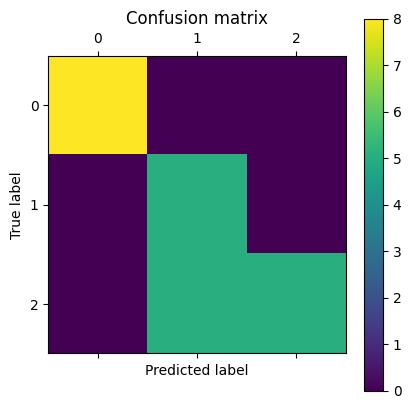

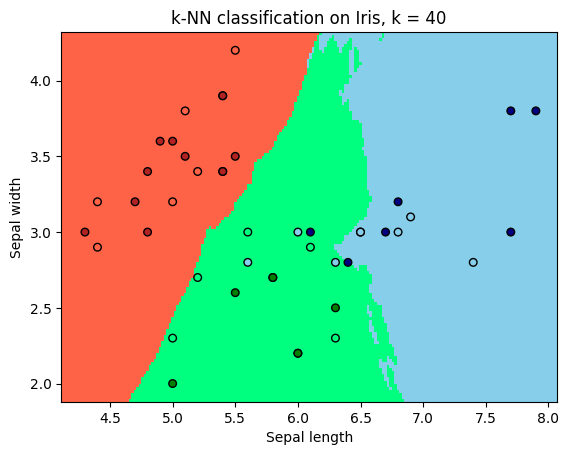

In [141]:
cf_matrix = metrics.confusion_matrix(y_test, best_model.predict(X_test))

###This part to show the matrix is taken from the documentation for ConfusionMatrixDisplay: 
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
plt.matshow(cf_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
###

#Showing the different 
plot_iris(X_val, y_val, X_test, y_test)
draw_knn_boundaries(best_model)
plt.title(f"k-NN classification on Iris, k = {best_model.get_params().get('n_neighbors')}")
plt.show()


### Confusion matrix results

The model is good at labling type 0, but it is mislabling some type 2 as type 1. By looking at the scattering of the valuation and test data, we can see large differences in the placement of points. The light points are the test data, and you can see that much of label 2 is inside label 1 territory, i.e., the green zone. Label 0 flowers have distinct features compared to labels 1 and 2. But labels 1 and 2 share some common features, so mislabeling them is likely. A possible solution is to increase the dimensions so it is easier to distinguish between labels 1 and 2 with the same sepal length and width values. But this will make the models more computationally heavy.